In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [209]:
# read the data
dataset = pd.read_csv('neat_crude_cut_properties.csv')

So far we have trained models to predict only 1 output. Create 10 different Ridge Regression models to predict columns: W_IBP-15 Lab,W_C5-105 Lab,W_105-165 Lab,W_165-227 Lab,W_227-270 lab,W_270-370 lab,W_370-390 Lab,W_390-410 Lab,390-565 Lab,W_565+ VR Lab (carefully check column names) 

You need to perform hyperparameter tuning to find the best alpha value for each model and perform 5-fold cross validation.

You need to print the following for each output column:
1. MSE on the test set of best model
2. Plot the weights (model.coef_) of each model on a graph where x-axis is each X feature (4000 - 4740nm) and y-axis is value of coefficient.

Print Average MSE across all columns on test set after training all columns.

In [210]:
# dataset.colums gives you columns: 3rd and from 13th: to the end]

feature_columns = list (dataset.columns[14:])
output_columns = list( dataset.columns[3:14])
del output_columns[9]
all_columns = feature_columns + output_columns

#cleaned_dataset = dataset[all_columns].dropna()

In [275]:
dataframes = {}
prediction_object = {
    'X_test': pd.DataFrame(),
    'Y_test': pd.DataFrame()
}
for i in output_columns:
    cleaned_dataset = dataset[feature_columns + [i]].dropna()
    X = cleaned_dataset[feature_columns]
    Y = cleaned_dataset[i]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
    dataframes[i] = {
        'X_train':  X_train,
        'Y_train':  Y_train,
    }
    prediction_object['X_test'].append(X_test)
    prediction_object['Y_test'].append(Y_test)
    

In [276]:
#dataframes[output_columns[9]]['X_train']
prediction_object

{'X_test': Empty DataFrame
 Columns: []
 Index: [],
 'Y_test': Empty DataFrame
 Columns: []
 Index: []}

In [213]:
parameters = {
    'alpha': list(np.linspace(0, 0.0000005, 10))
}

#### Part 1
1. add best_estimator
2. use best estimator to create y_pred
3. generate MSE for each 
4. compera them 

In [251]:
for i in output_columns:
    
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, parameters, scoring ='neg_mean_squared_error', cv =5)
    parameters ={
    'alpha': list(np.linspace(0, 0.0000005, 10))
                }
    dataframes[i]['model'] = grid_search.fit( \
        dataframes[i]['X_train'],\
        dataframes[i]['Y_train']\
    )
    dataframes[i]['best_estimator'] = dataframes[i]['model'].best_estimator_
    
prediction_object = {
    
}

for i in output_columns:
    dataframes[i]['Y_pred'] = dataframes[i]['model'].best_estimator_.predict(dataframes[i]['X_test'])
    dataframes[i]['MSE'] = metrics.mean_squared_error( dataframes[i]['Y_test'], dataframes[i]['Y_pred'])
    

In [257]:
dataframes[output_columns[1]]

{'X_train':               4740          4739      4730          4728      4725  \
 1500 -1.640000e-06 -1.930000e-06 -0.000006 -6.860000e-06 -0.000008   
 1444 -4.140000e-06 -4.070000e-06 -0.000003 -2.300000e-06 -0.000001   
 1     2.240000e-06  2.440000e-06  0.000005  6.120000e-06  0.000008   
 1803  1.820000e-06  1.500000e-06 -0.000001 -2.240000e-06 -0.000003   
 1617 -8.120000e-06 -8.200000e-06 -0.000007 -6.290000e-06 -0.000005   
 ...            ...           ...       ...           ...       ...   
 1935 -1.840000e-06 -2.140000e-06 -0.000005 -5.490000e-06 -0.000006   
 587   1.290000e-05  1.340000e-05  0.000019  2.010000e-05  0.000022   
 25   -7.250000e-06 -7.020000e-06 -0.000002 -4.270000e-07  0.000002   
 1017  7.770000e-07  6.100000e-07 -0.000002 -2.410000e-06 -0.000003   
 1464 -1.430000e-06 -1.510000e-06  0.000003  3.270000e-06  0.000004   
 
               4720      4716      4696      4680      4676  ...      4032  \
 1500 -6.420000e-06 -0.000002  0.000051  0.000128  0.0001

In [256]:
array = []

for i in output_columns:
        print (dataframes[i]['MSE'])

0.21927468423321594
4.418225062588418
1.701970486509209
0.8438219465918084
0.41401730020244804
1.6620403545431865
0.1575120758505832
1.2481788726473926
3.139442982391361
2.710890358778594


#### Part 2
1. design an alrorythms of finetuning hyperparameters 
#### a =
#### b  = 
#### parameters = {
####    'alpha': list(np.linspace(a, b, 10))
#### Run gridsearch -> return best aphas 
#### after I get the best alpha update a and b to zoom in on the range 
#### exiting criteria??
#### ^number of iterations for noe 


Ridge(alpha=5.5555555555555555e-08)

In [184]:
y_0_pred = models[0].predict(X_test)
y_1_pred = models[1].predict(X_test)
y_2_pred = models[2].predict(X_test)
y_3_pred = models[3].predict(X_test)
y_4_pred = models[4].predict(X_test)
y_5_pred = models[5].predict(X_test)
y_6_pred = models[6].predict(X_test)
y_7_pred = models[7].predict(X_test)
y_8_pred = models[8].predict(X_test)
y_9_pred = models[9].predict(X_test)

In [185]:
for i in range(len(output_columns)):
       locals()["y_pred"+ str(i)] = ["model"+ str(i)].predict(X_test)

AttributeError: 'list' object has no attribute 'predict'

In [ ]:
best_estimator = []
for i in range(len(final_grid_models)):
    print (final_grid_models[i].best_estimator_)
    best_estimator.append(final_grid_models[i].best_estimator_)

In [ ]:
Y_pred = []

for i in range(len(final_grid_models)):
    y_pred = final_grid_models[i].best_estimator_.predict(X_test)
    Y_pred.append(y_pred)
    print('Mean Squared Error:', metrics.mean_squared_error(Y_test[output_columns[i]], y_pred))


[GridSearchCV(cv=5, estimator=Ridge(),
              param_grid={'alpha': [0.0, 5.5555555555555555e-08,
                                    1.1111111111111111e-07,
                                    1.6666666666666668e-07,
                                    2.2222222222222222e-07,
                                    2.7777777777777776e-07,
                                    3.3333333333333335e-07,
                                    3.888888888888889e-07,
                                    4.4444444444444444e-07, 5e-07]},
              scoring='neg_mean_squared_error'),
 GridSearchCV(cv=5, estimator=Ridge(),
              param_grid={'alpha': [0.0, 5.5555555555555555e-08,
                                    1.1111111111111111e-07,
                                    1.6666666666666668e-07,
                                    2.2222222222222222e-07,
                                    2.7777777777777776e-07,
                                    3.3333333333333335e-07,
               

Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)
Ridge(alpha=5.5555555555555555e-08)


Mean Squared Error: 632.3765835198461
Mean Squared Error: 452.08746439747733
Mean Squared Error: 431.37611943026974
Mean Squared Error: 394.0990694039247
Mean Squared Error: 422.7449778323732
Mean Squared Error: 188.63078412801568
Mean Squared Error: 629.4755771604187
Mean Squared Error: 586.4775652722165
Mean Squared Error: 81.22600279726822
Mean Squared Error: 2.9023322001882232


In [230]:
dataframes[output_columns[1]]['model']

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0, 5.5555555555555555e-08,
                                   1.1111111111111111e-07,
                                   1.6666666666666668e-07,
                                   2.2222222222222222e-07,
                                   2.7777777777777776e-07,
                                   3.3333333333333335e-07,
                                   3.888888888888889e-07,
                                   4.4444444444444444e-07, 5e-07]},
             scoring='neg_mean_squared_error')

In [231]:
dataframes[output_columns[1]]['model'].best_estimator_

Ridge(alpha=5.5555555555555555e-08)

array([  2286.34031963,   2396.11279274,   4464.16174816,   4881.90455194,
         5875.91715734,   7258.34802863,   7627.86685505,   7811.82333484,
         7276.888203  ,   5919.05050069,   4631.13345695,   3851.32873839,
         2758.0017405 ,  -2747.55321009,  -3080.65308317,  -2532.55612547,
        -1543.43478629,   -949.14662691,    402.56550218,   1863.01434386,
         3189.28807567,   4250.22760564,   4840.32758611,   2556.57961957,
         2439.74619567,   1694.13797004,   1367.47887333,   -235.17659129,
        -7591.60471371,  -9112.37008928, -10547.85364386, -12366.40854321,
        -7517.86245474,  -6545.18179715,  -4945.91297686,  -2458.89876278,
         1153.91748186,   1896.28945521,   2791.7524196 ,    957.24266833,
           60.6795734 ,   2144.55710649,   2578.83138395,   1628.61892076,
         1550.08667139,   1187.5795095 ,   1323.84960511,    854.03167315,
           24.7346306 ,   -589.36156564,  -1085.69276705,  -1691.15821002,
        -1886.14364267,  

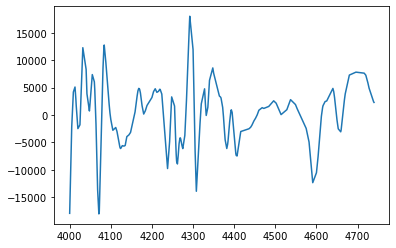

In [239]:
x = list(map(int, feature_columns))
y = dataframes[output_columns[1]]['model'].best_estimator_.coef_

plt.plot(x, y)

In [ ]:
ridge